Explained variance ratio:  [0.79015617 0.19914744]


/var/folders/4s/j3khqjy96wj5f_dkqk0kf9pw0000gn/T/ipykernel_60849/2438128218.py:32: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


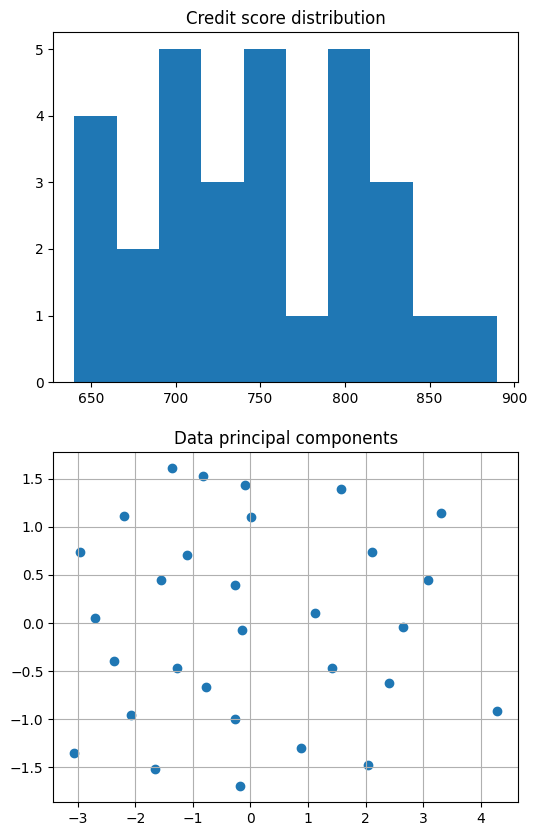

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 10))

# 1: Data download
data = pandas.read_csv("./conjuto_datos.csv")
clean_data = data.dropna().drop_duplicates()
clean_data.drop(columns=["ID"])

# 2: Data preprocessing
ax1.hist(clean_data["Calificación_Crédito"].sort_values())
ax1.set_title("Credit score distribution")

# 3: apply PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clean_data)

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio: ", explained_variance)

df = pandas.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
ax2.scatter(df['PC1'], df['PC2'])
ax2.set_title("Data principal components")
ax2.grid()

fig.show()
